In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

import lsst.utils.tests as tests
import lsst.daf.base as dafBase
import lsst.afw.display.ds9 as ds9
import lsst.afw.image as afwImage
import lsst.afw.geom as afwGeom
import lsst.afw.table as afwTable
import lsst.afw.math as afwMath
import lsst.meas.algorithms as measAlg
import lsst.ip.diffim as ipDiffim

display = False
np.random.seed(666)

In [19]:
fracOffset = 1.2
psfWidth=2.0
psfSize = int(psfWidth * 20.) + 1

generator = afwMath.DoubleGaussianFunction2D(psfWidth, psfWidth*1.75, 0.1)
y = [generator(x, 0) for x in np.linspace(-10., 10., 100)]
y2 = [generator(x, 1.) for x in np.linspace(-10., 10., 100)]

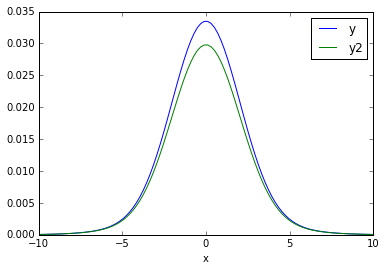

In [20]:
import pandas as pd
df = pd.DataFrame( {'x':np.linspace(-10., 10., 100), 'y':y, 'y2':y2} )
df.plot(x='x')

In [58]:
w = 100
h = 100
xc = 50.
yc = 50.

image = afwImage.MaskedImageF(w,h)
image.set(0)
array = image.getImage().getArray()
array[:,:] = np.random.randn(w,h)
# Set variance to 1.0
var   = image.getVariance()
var.set(1.0)

array  = image.getImage().getArray()
print array.size, array.shape

imPos = np.ndarray( (100,100), buffer=np.array([ np.abs(i-xc)+np.abs(j-yc) for i in xrange(w) for j in xrange(h) ]) )
                   
array[:] = imPos/100.

10000 (100, 100)


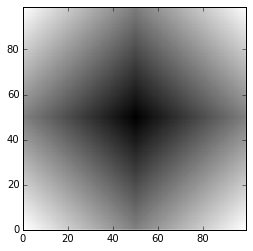

In [59]:
plt.imshow(np.rot90(array), cmap='gray', extent=(0,99,0,99), interpolation='none')
plt.show()

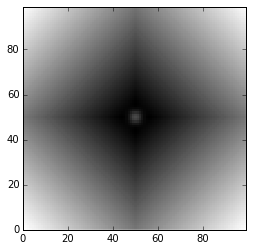

In [60]:
psfWidth = 2.0
generator = afwMath.DoubleGaussianFunction2D(psfWidth, psfWidth*1.75, 0.1)    
imPos = np.ndarray( (w,h), buffer=np.array([ generator(i-xc,j-yc) for i in xrange(w) for j in xrange(h) ]) )
array[:] += imPos*10.

plt.imshow(np.rot90(array), cmap='gray', extent=(0,99,0,99), interpolation='none')
plt.show()